In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [43]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [44]:
def generate_coordinates(min_lat, max_lat, min_lon, max_lon, num_points):
    coordinates = []

    for _ in range(num_points):
        latitude = random.uniform(min_lat, max_lat)
        longitude = random.uniform(min_lon, max_lon)
        coordinates.append((latitude, longitude))

    return coordinates

# Example usage:
min_latitude = 37.0
max_latitude = 38.0
min_longitude = -122.0
max_longitude = -121.0
num_points = 100

generated_coordinates = generate_coordinates(min_latitude, max_latitude, min_longitude, max_longitude, num_points)

# Convert to DataFrame
df = pd.DataFrame(generated_coordinates, columns=['Latitude', 'Longitude'])

# Print the DataFrame
print(df)

     Latitude   Longitude
0   37.296282 -121.660759
1   37.515092 -121.116037
2   37.564567 -121.085208
3   37.629218 -121.162042
4   37.966165 -121.130938
..        ...         ...
95  37.341079 -121.815575
96  37.961090 -121.108641
97  37.182574 -121.033521
98  37.189317 -121.628242
99  37.426664 -121.381160

[100 rows x 2 columns]


In [45]:
lat0 = df.iloc[[0]]['Latitude']
long0 = df.iloc[[0]]['Longitude']

In [46]:
lat0, long0

(0    37.296282
 Name: Latitude, dtype: float64,
 0   -121.660759
 Name: Longitude, dtype: float64)

In [47]:
haversine_from_start_fin = []

In [48]:
df

,Latitude,Longitude
0,37.296282,-121.660759
1,37.515092,-121.116037
2,37.564567,-121.085208
3,37.629218,-121.162042
4,37.966165,-121.130938
...,...,...
95,37.341079,-121.815575
96,37.961090,-121.108641
97,37.182574,-121.033521
98,37.189317,-121.628242


In [49]:
for i in range(len(df)):
  lat, long = df.iloc[[i]]["Latitude"], df.iloc[[i]]["Longitude"]
  haversine_dist = haversine(lat0, long0, lat, long)
  haversine_from_start_fin.append(haversine_dist)

/tmp/ipykernel_16739/1737340714.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])


In [50]:
def generate_coordinates(num_points):
    # Define intervals for latitude and longitude
    intervals = [
        ((37.0, 37.5), (-122.0, -121.5)),  # Interval 1
        ((37.5, 37.7), (-121.5, -121.0)),  # Interval 2
        ((37.7, 38.0), (-121.0, -120.5))   # Interval 3
    ]

    coordinates = []

    for interval in intervals:
        min_lat, max_lat = interval[0]
        min_lon, max_lon = interval[1]

        center_lat = (min_lat + max_lat) / 2
        center_lon = (min_lon + max_lon) / 2

        latitudes = np.random.normal(center_lat, (max_lat - min_lat) / 8, num_points // 3)
        longitudes = np.random.normal(center_lon, (max_lon - min_lon) / 8, num_points // 3)

        # Clip coordinates to ensure they are within the specified boundaries
        latitudes = np.clip(latitudes, min_lat, max_lat)
        longitudes = np.clip(longitudes, min_lon, max_lon)

        coordinates.extend(list(zip(latitudes, longitudes)))

    return coordinates

In [51]:
# Example usage:
num_points = 15000

generated_coordinates = generate_coordinates(num_points)

# Convert to DataFrame
df = pd.DataFrame(generated_coordinates, columns=['Latitude', 'Longitude'])

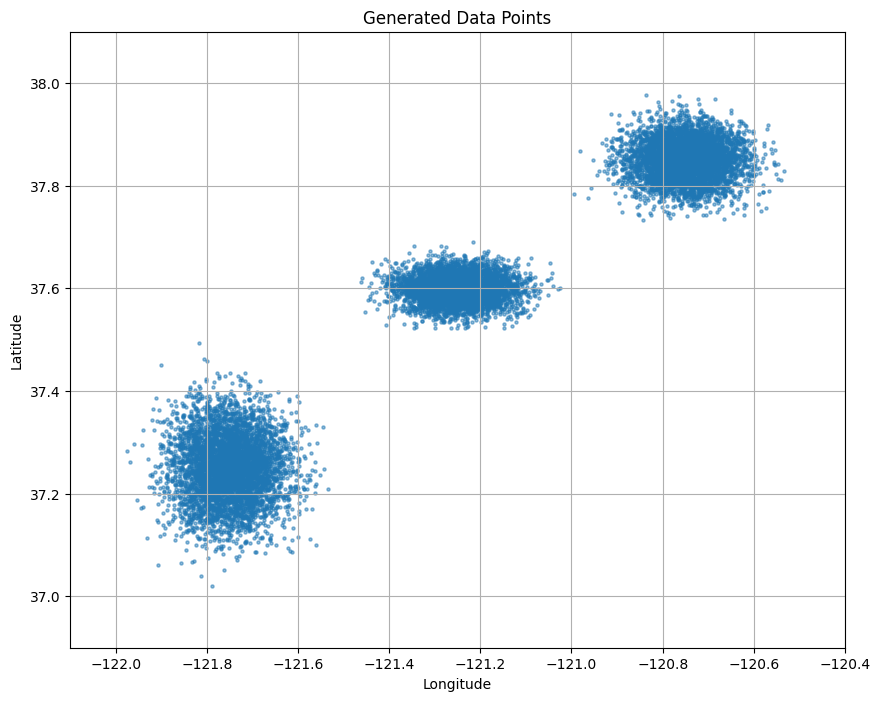

In [52]:
# Plot the generated points
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], s=5, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Generated Data Points')
plt.xlim(-122.1, -120.4)
plt.ylim(36.9, 38.1)
plt.grid(True)
plt.show()

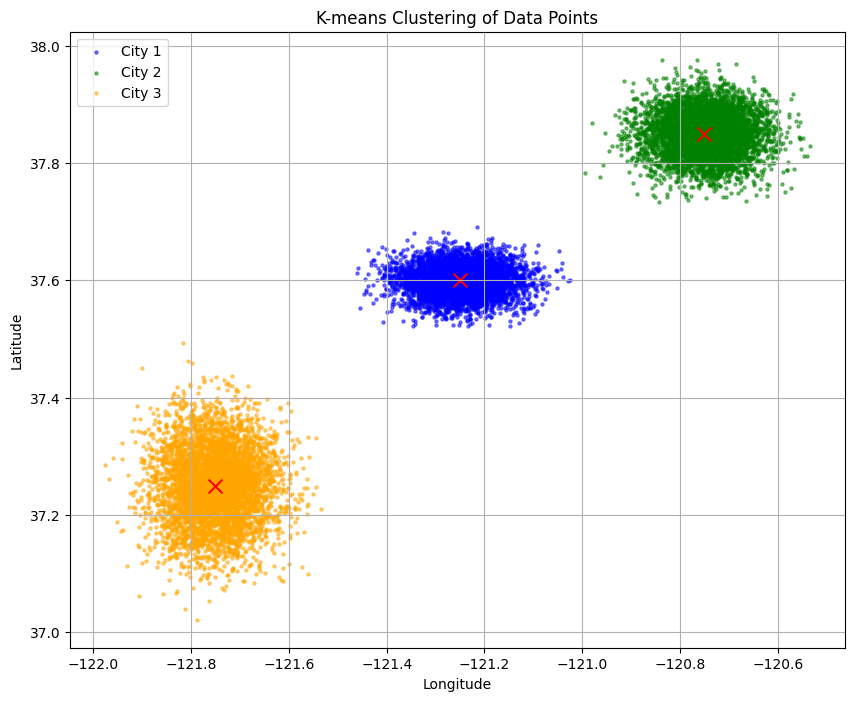

In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

cluster_colors = ['blue', 'green', 'orange']
city_labels = ['City 1', 'City 2', 'City 3']

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(df[df['Cluster'] == i]['Longitude'], df[df['Cluster'] == i]['Latitude'], 
                c=cluster_colors[i], label=city_labels[i], s=5, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='x', s=100, c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Data Points')
plt.grid(True)
plt.legend()
plt.show()

In [54]:
city_names = {0: 'Coimbatore', 1: 'Erode', 2: 'Salem'}
city_dfs = {}
for city_label, city_name in city_names.items():
    city_dfs[city_name] = df[df['Cluster'] == city_label]

# Write each city's DataFrame to CSV
for city_name, city_df in city_dfs.items():
    city_df.to_csv(f'{city_name}.csv', index=False)

# Write the master DataFrame to CSV
df.to_csv('master_dataframe.csv', index=False)

In [55]:
for city in city_dfs:
    print(city, len(city_dfs[city]))

Coimbatore 5000
Erode 5000
Salem 5000


In [56]:
dfc = city_dfs['Coimbatore']

In [57]:
dfc.head()

,Latitude,Longitude,Cluster
5000,37.580335,-121.240076,0
5001,37.604987,-121.040026,0
5002,37.626297,-121.269253,0
5003,37.559299,-121.154000,0
5004,37.604199,-121.191619,0


In [60]:
dfc = dfc.drop(columns=['Cluster'])

In [61]:
dfc.head()

,Latitude,Longitude
5000,37.580335,-121.240076
5001,37.604987,-121.040026
5002,37.626297,-121.269253
5003,37.559299,-121.154000
5004,37.604199,-121.191619


In [62]:
from scipy.spatial.distance import pdist, squareform

In [64]:
distances = pdist(dfc[['Latitude', 'Longitude']], 
                  lambda u, v: haversine(u[0], u[1], v[0], v[1]))

In [65]:
distance_matrix = squareform(distances)

In [68]:
distance_matrix

array([[ 0.        , 22.2896517 ,  4.19006201, ...,  3.47624978,
         8.82420708,  5.32088665],
       [22.2896517 ,  0.        , 25.51825571, ..., 19.19951734,
        30.90672089, 16.99447853],
       [ 4.19006201, 25.51825571,  0.        , ...,  6.36618744,
         5.5020634 ,  8.70635404],
       ...,
       [ 3.47624978, 19.19951734,  6.36618744, ...,  0.        ,
        11.70772974,  2.38378957],
       [ 8.82420708, 30.90672089,  5.5020634 , ..., 11.70772974,
         0.        , 13.95141116],
       [ 5.32088665, 16.99447853,  8.70635404, ...,  2.38378957,
        13.95141116,  0.        ]])